In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf



In [30]:
plt.style.use('fivethirtyeight')

In [31]:
var_set = pd.read_csv('var_set.csv', parse_dates=[0],index_col=[0])
var_set.index.name = 'date'

In [32]:
var_set.describe()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI
count,507.000000,507.000000,507.000000,507.00000,507.000000
mean,56.746134,24.553419,58.029858,107.68787,113.528519
std,15.455462,8.096777,7.900179,8.49126,8.544862
min,27.870000,10.275557,36.507234,95.55000,92.040000
25%,44.875000,20.365239,51.971903,100.22500,110.127000
50%,55.460000,24.035290,59.300626,105.90000,114.486000
75%,65.710000,30.478502,63.418690,112.40000,118.710500
max,125.870000,49.076318,79.182888,129.50000,138.094000


In [135]:
var_set['Month'] = pd.DatetimeIndex(var_set.index).month

In [136]:
var_set.head(10)

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI,Month
date,,,,,,
2013-04-07,39.63,10.754267,47.577612,95.55,92.1500,4
2013-04-14,41.89,10.800751,47.924958,95.70,92.1920,4
2013-04-21,43.07,10.774089,47.092639,95.85,92.7980,4
2013-04-28,42.70,10.569605,47.193296,96.00,93.8080,4
2013-05-05,41.81,10.605343,48.987917,96.02,93.3125,5
2013-05-12,41.81,10.491056,48.199836,96.05,93.2225,5
2013-05-19,42.90,10.936346,49.206759,96.08,92.4525,5
2013-05-26,43.57,10.497166,48.563055,96.10,92.0400,5
2013-06-02,40.60,11.991400,49.437460,96.00,92.8700,6


<Axes: title={'center': 'Evolution of the Salmon Price'}, xlabel='date'>

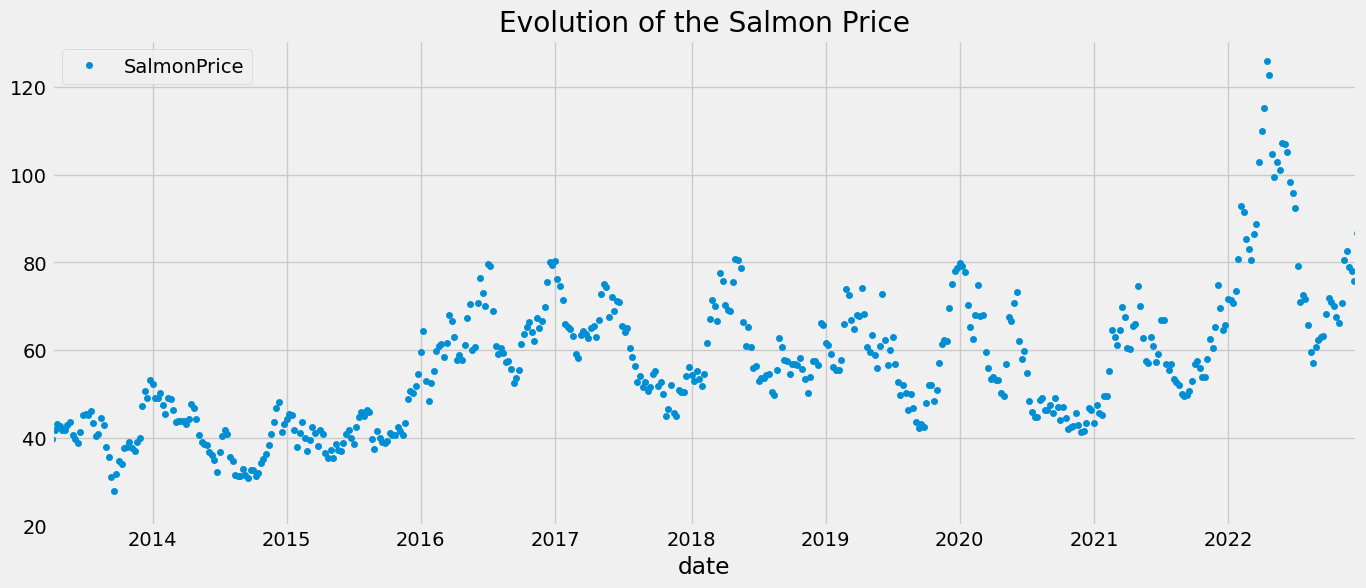

In [35]:
var_set.SalmonPrice.plot(figsize=(15,6), legend=True, title='Evolution of the Salmon Price', yticks = (20, 40, 60, 80, 100, 120), style='.', mew=2)


In [139]:
reg_line = smf.ols(formula = 'SalmonPrice ~ Month', data = var_set).fit()

reg_line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SalmonPrice   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     24.55
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           9.91e-07
Time:                        16:34:16   Log-Likelihood:                -2095.0
No. Observations:                 507   AIC:                             4194.
Df Residuals:                     505   BIC:                             4202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.2108      1.467     43.083      0.000      60.328      66.093
Month         -0.9758      0.197     -4.955      0.000      -1.363      -0.589
==============================================================================
Omnibus:                       83.641   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.325
Skew:                           0.978   Prob(JB):                     1.68e-32
Kurtosis:                       4.760   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
var_set.dtypes

SalmonPrice     float64
CodPrice        float64
HalibutPrice    float64
CPI             float64
TWI             float64
Month             int64
dtype: object

In [37]:
var_set.corr()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI,Month
SalmonPrice,1.000000,0.618946,0.475260,0.641214,0.429407,-0.215305
CodPrice,0.618946,1.000000,0.472403,0.884648,0.800880,0.060235
HalibutPrice,0.475260,0.472403,1.000000,0.422434,0.251690,-0.108150
CPI,0.641214,0.884648,0.422434,1.000000,0.732456,0.066142
TWI,0.429407,0.800880,0.251690,0.732456,1.000000,0.020442
Month,-0.215305,0.060235,-0.108150,0.066142,0.020442,1.000000


In [38]:
var_set.cov()

,SalmonPrice,CodPrice,HalibutPrice,CPI,TWI,Month
SalmonPrice,238.871306,77.454556,58.029708,84.150539,56.709516,-11.348211
CodPrice,77.454556,65.557801,30.217697,60.821149,55.409534,1.663215
HalibutPrice,58.029708,30.217697,62.412827,28.337900,16.990588,-2.913773
CPI,84.150539,60.821149,28.337900,72.101491,53.144554,1.915307
TWI,56.709516,55.409534,16.990588,53.144554,73.014661,0.595681
Month,-11.348211,1.663215,-2.913773,1.915307,0.595681,11.630033


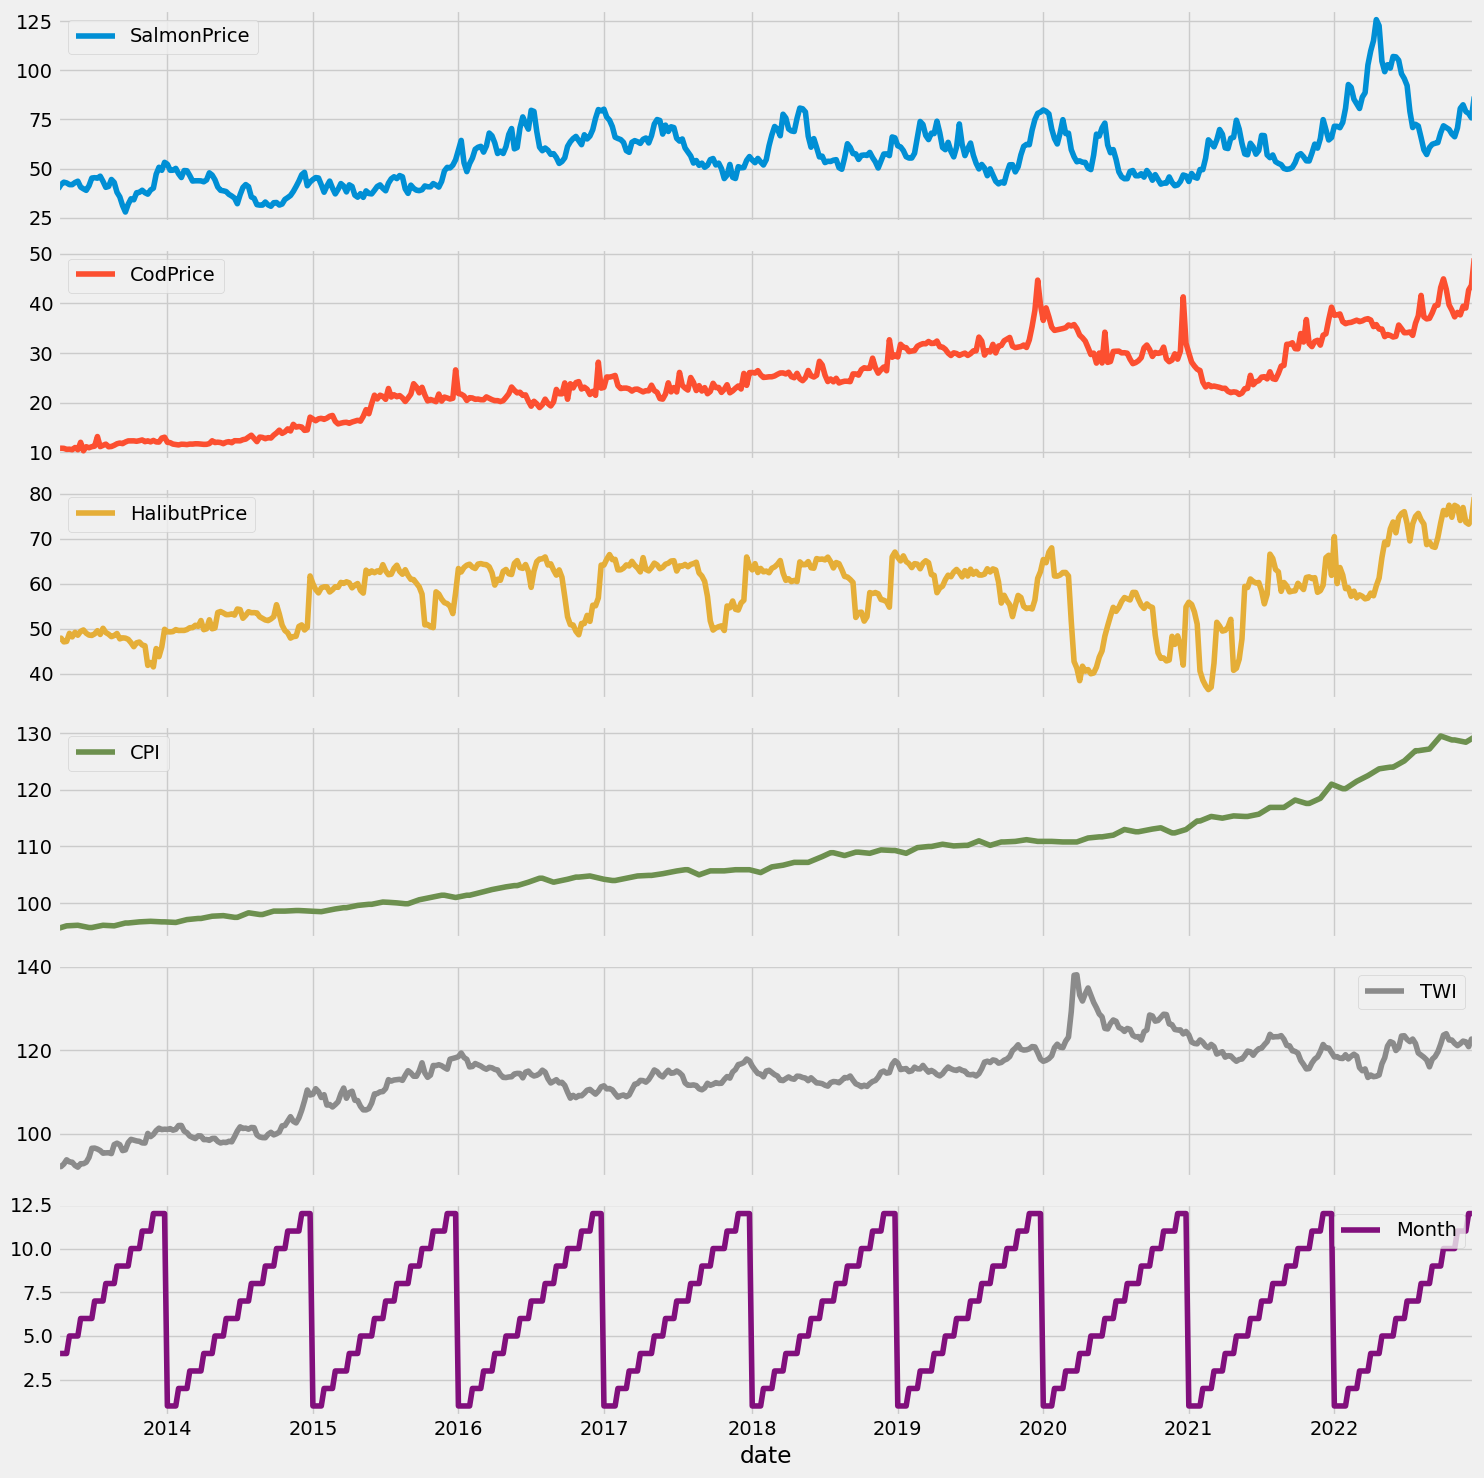

In [39]:
var_set.plot(subplots = True, figsize=(15,15))

plt.tight_layout()
plt.show()

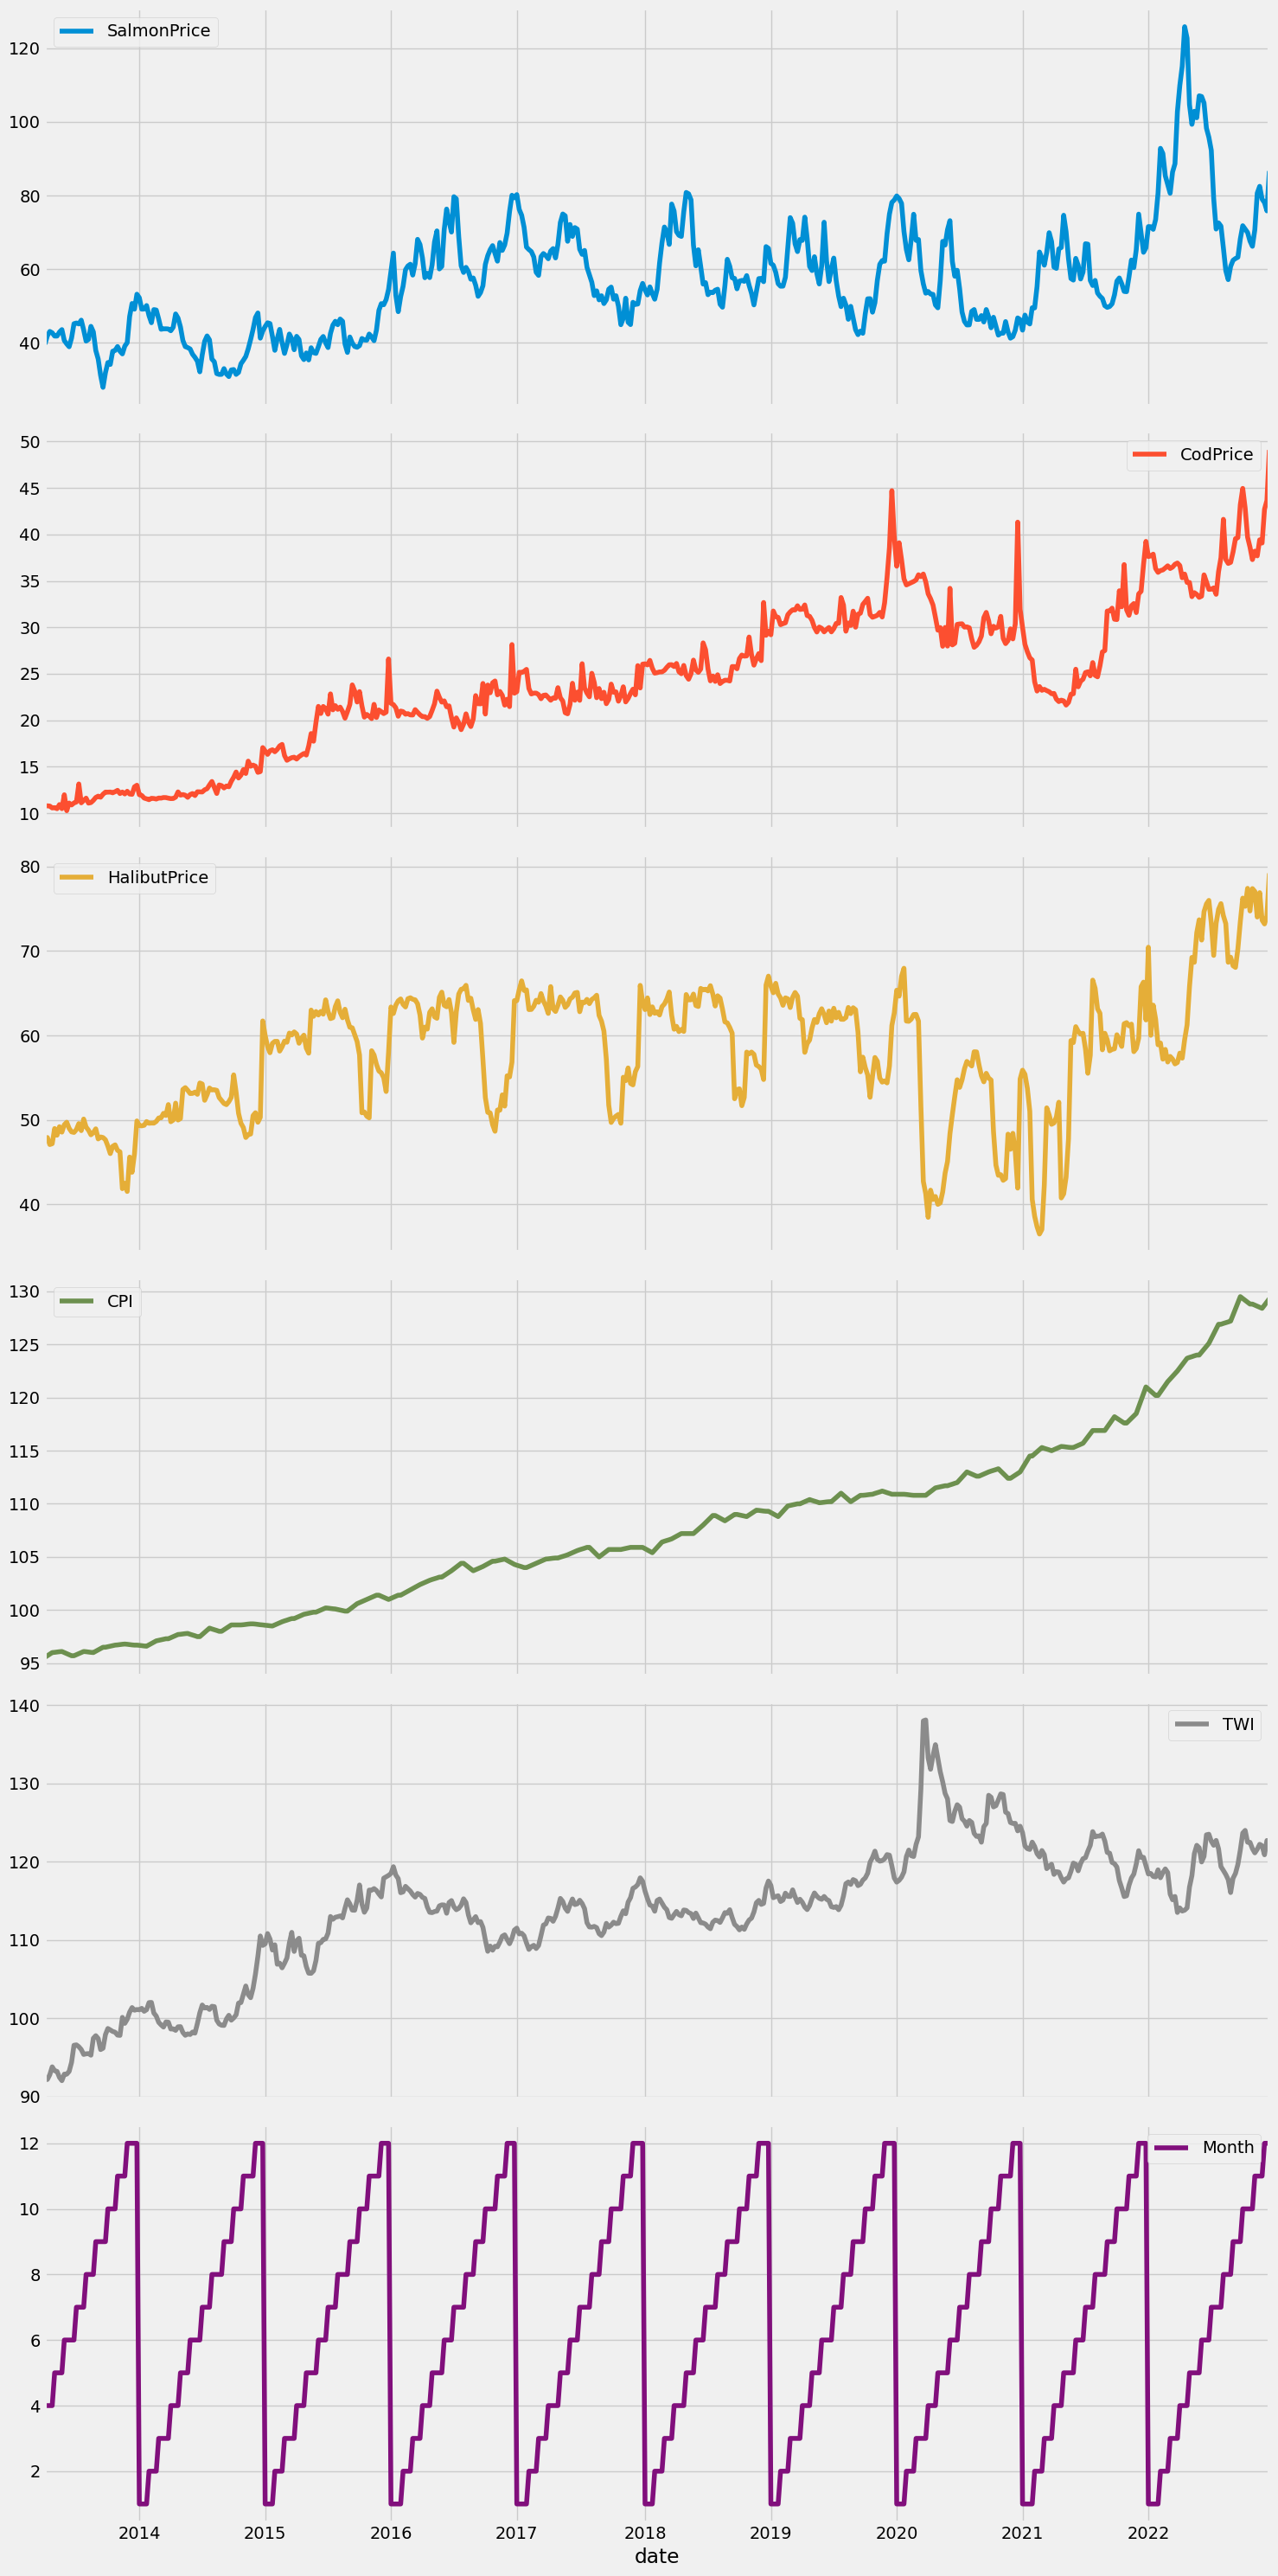

In [40]:
var_set.plot(subplots = True, figsize=(15,30))

plt.tight_layout()
plt.show()



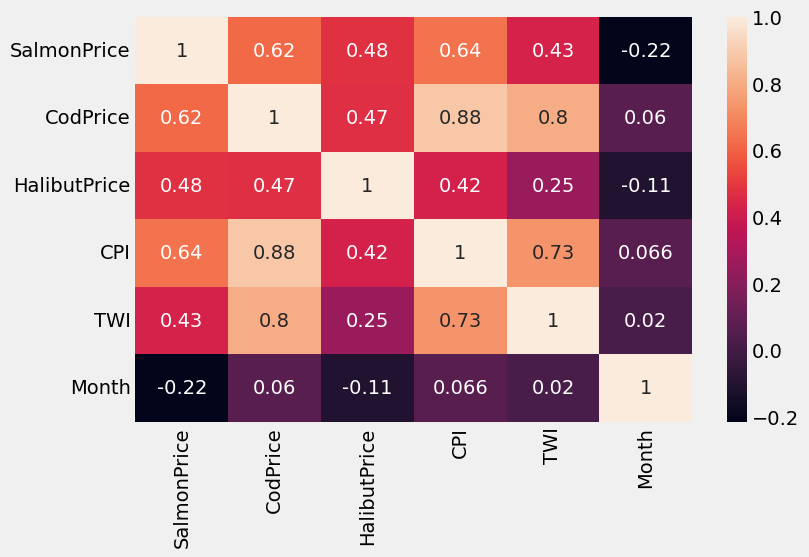

In [41]:
plt.figure(figsize=(8,5))
sns.heatmap(var_set.corr(numeric_only=True), annot=True)
plt.show()

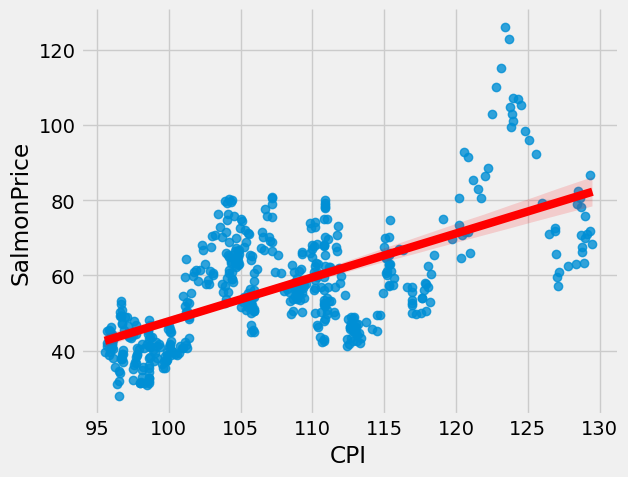

In [42]:
sns.lmplot(x="CPI", y="SalmonPrice", data=var_set,height=5, aspect=1.3, line_kws={'color': 'red'})

plt.show()